In [52]:
import  matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as sla

In [50]:
mean1 = np.array([2, 3])
mean2 = np.array([-1, -1])
mean3 = np.array([-2, 2])

covar1 = np.array([[1,  0.5],  [0.5,  1.2]])
covar2 = np.array([[1,  0.7],  [0.7,  0.9]])
covar3 = np.array([[0.8,  0.5],  [0.5,  0.8]])

sample1 = np.random.multivariate_normal(mean1, covar1, size=100)
sample2 = np.random.multivariate_normal(mean2, covar2, size=100)
sample3 = np.random.multivariate_normal(mean3, covar3, size=100)

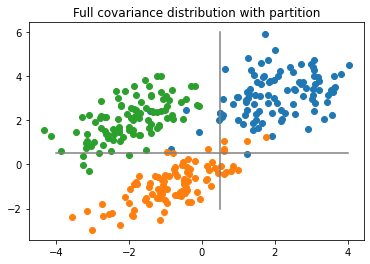

In [94]:
samples = [sample1, sample2, sample3]

for i in range(3):
    s = samples[i]
    plt.scatter(s[:, 0], s[:, 1])
    
lin1 = np.array([[(i*8) / 1000 - 4,  0.5] for i in range(1000)])
lin2 = np.array([[0.5, (i*8) / 1000 - 2] for i in range(1000)])
    
plt.plot(lin1[:, 0], lin1[:, 1], color="grey")
plt.plot(lin2[:, 0], lin2[:, 1], color="grey")
plt.title("Full covariance distribution with partition")
plt.show()

In [77]:
evalues1, evectors1 = sla.eigh(covar1)
evalues2, evectors2 = sla.eigh(covar2)
evalues3, evectors3 = sla.eigh(covar3)

In [84]:
covar1

array([[1. , 0.5],
       [0.5, 1.2]])

In [82]:
np.matmul(np.transpose(evectors1), np.matmul(np.diag(evalues1), evectors1))

array([[1. , 0.5],
       [0.5, 1.2]])

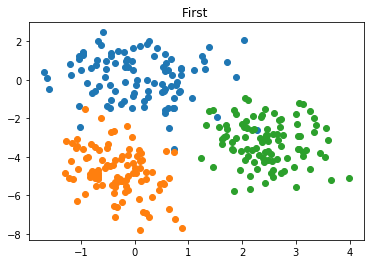

In [101]:
for i in range(3):
    s = samples[i]
    sample_new = np.matmul(s - mean1, np.transpose(evectors1)) # + mean1
    plt.scatter(sample_new[:, 0], sample_new[:, 1])
l1_new = np.matmul(lin1 - mean1, np.transpose(evectors1))
plt.plot(lin1[:, 0], lin1[:, 1], color="grey")
plt.plot(lin2[:, 0], lin2[:, 1], color="grey")
plt.title("First transformation")
plt.show()

In [ ]:
# fig = plt.figure(figsize=(5,5))
# plt.title(f"Basis")

# lim_u = 1.5 * basis2d.max()  
# lim_l = 1.5 * basis2d.min()
# XX, YY = np.meshgrid(np.linspace(lim_l, lim_u, 100), np.linspace(lim_l, lim_u, 100))
# data = pca.inverse_transform(np.column_stack((XX.ravel(), YY.ravel())))
# inpt = np.zeros((data.shape[0], 0))
# mask = np.ones_like(data, dtype=bool)
# tag = None
# lls = model_org.observations.log_likelihoods(data, input, mask, tag)
# for k in range(K):
#     plt.plot(basis2d[true_states==k, 0], basis2d[true_states==k, 1], 'o', mfc=colors[k], mec='none', ms=4, alpha=0.3)
#     plt.contour(XX, YY, np.exp(lls[:, k]).reshape(XX.shape), cmap=white_to_color_cmap(colors[k]))
# plt.plot(basis2d[:,0], basis2d[:,1], '-k', lw=1, alpha=.25)
# plt.show()